# OpenMeteo Data Analysis - 2023 Complete Dataset

Analysis of the **COMPLETE 2023** weather data from OpenMeteo.

**Version**: V2 - Full 2023 data including Sept-Oct

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

data_path = '/Users/vojtech/Code/Bard89/Project-Data/data/processed/jp_openmeteo_processed_20230101_to_20231231.csv'
print(f"Loading OpenMeteo data from: {data_path}")

df = pd.read_csv(data_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

In [2]:
data_path = '/Users/vojtech/Code/Bard89/Project-Data/data/processed/jp_openmeteo_processed_20230101_to_20231231.csv'
print(f"Loading OpenMeteo data from: {data_path}")

df = pd.read_csv(data_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

Loading OpenMeteo data from: /Users/vojtech/Code/Bard89/Project-Data/data/processed/jp_openmeteo_processed_20230101_to_20231231.csv
Dataset shape: 4,400,280 rows × 41 columns
Date range: 2023-01-01 00:00:00+00:00 to 2023-12-31 23:00:00+00:00
Memory usage: 2102.4 MB


In [3]:
print("First 10 rows:")
display(df.head(10))

print("\nLast 10 rows:")
display(df.tail(10))

First 10 rows:


,timestamp,h3_index_res8,cloud_cover_pct_mean,cloud_cover_pct_std,cloud_cover_pct_min,cloud_cover_pct_max,cloud_cover_pct_count,dew_point_c_mean,dew_point_c_std,dew_point_c_min,dew_point_c_max,dew_point_c_count,humidity_pct_mean,humidity_pct_std,humidity_pct_min,humidity_pct_max,humidity_pct_count,precipitation_mm_mean,precipitation_mm_std,precipitation_mm_min,precipitation_mm_max,precipitation_mm_count,pressure_hpa_mean,pressure_hpa_std,pressure_hpa_min,pressure_hpa_max,pressure_hpa_count,solar_radiation_wm2_mean,solar_radiation_wm2_std,solar_radiation_wm2_min,solar_radiation_wm2_max,solar_radiation_wm2_count,temperature_c_mean,temperature_c_std,temperature_c_min,temperature_c_max,temperature_c_count,h3_lat_res8,h3_lon_res8,data_source,country
0,2023-01-01 00:00:00+00:00,8814927535fffff,5.00,NaN,5.00,5.00,1,-17.90,NaN,-17.90,-17.90,1,75.00,NaN,75.00,75.00,1,0.00,NaN,0.00,0.00,1,996.70,NaN,996.70,996.70,1,0.00,NaN,0.00,0.00,1,-14.50,NaN,-14.50,-14.50,1,45.00,128.00,openmeteo,JP
1,2023-01-01 00:00:00+00:00,881492d9d1fffff,0.00,NaN,0.00,0.00,1,-18.10,NaN,-18.10,-18.10,1,69.00,NaN,69.00,69.00,1,0.00,NaN,0.00,0.00,1,1004.80,NaN,1004.80,1004.80,1,0.00,NaN,0.00,0.00,1,-13.60,NaN,-13.60,-13.60,1,45.00,127.00,openmeteo,JP
2,2023-01-01 00:00:00+00:00,882e004a31fffff,79.00,NaN,79.00,79.00,1,-1.80,NaN,-1.80,-1.80,1,55.00,NaN,55.00,55.00,1,0.00,NaN,0.00,0.00,1,1017.90,NaN,1017.90,1017.90,1,0.00,NaN,0.00,0.00,1,6.70,NaN,6.70,6.70,1,40.00,144.00,openmeteo,JP
3,2023-01-01 00:00:00+00:00,882e009201fffff,20.00,NaN,20.00,20.00,1,-0.20,NaN,-0.20,-0.20,1,57.00,NaN,57.00,57.00,1,0.00,NaN,0.00,0.00,1,1018.30,NaN,1018.30,1018.30,1,0.00,NaN,0.00,0.00,1,7.80,NaN,7.80,7.80,1,39.00,144.00,openmeteo,JP
4,2023-01-01 00:00:00+00:00,882e01ae65fffff,2.00,NaN,2.00,2.00,1,-0.20,NaN,-0.20,-0.20,1,65.00,NaN,65.00,65.00,1,0.00,NaN,0.00,0.00,1,1019.30,NaN,1019.30,1019.30,1,0.00,NaN,0.00,0.00,1,5.80,NaN,5.80,5.80,1,39.00,142.00,openmeteo,JP
5,2023-01-01 00:00:00+00:00,882e027859fffff,66.00,NaN,66.00,66.00,1,0.00,NaN,0.00,0.00,1,67.00,NaN,67.00,67.00,1,0.10,NaN,0.10,0.10,1,1016.60,NaN,1016.60,1016.60,1,0.00,NaN,0.00,0.00,1,5.80,NaN,5.80,5.80,1,41.00,144.00,openmeteo,JP
6,2023-01-01 00:00:00+00:00,882e039893fffff,6.00,NaN,6.00,6.00,1,-3.40,NaN,-3.40,-3.40,1,52.00,NaN,52.00,52.00,1,0.00,NaN,0.00,0.00,1,1018.50,NaN,1018.50,1018.50,1,0.00,NaN,0.00,0.00,1,5.80,NaN,5.80,5.80,1,40.00,143.00,openmeteo,JP
7,2023-01-01 00:00:00+00:00,882e045025fffff,93.00,NaN,93.00,93.00,1,-0.90,NaN,-0.90,-0.90,1,54.00,NaN,54.00,54.00,1,0.00,NaN,0.00,0.00,1,1017.70,NaN,1017.70,1017.70,1,0.00,NaN,0.00,0.00,1,7.70,NaN,7.70,7.70,1,39.00,145.00,openmeteo,JP
8,2023-01-01 00:00:00+00:00,882e056f27fffff,62.00,NaN,62.00,62.00,1,-0.20,NaN,-0.20,-0.20,1,59.00,NaN,59.00,59.00,1,0.00,NaN,0.00,0.00,1,1019.00,NaN,1019.00,1019.00,1,0.00,NaN,0.00,0.00,1,7.20,NaN,7.20,7.20,1,39.00,143.00,openmeteo,JP
9,2023-01-01 00:00:00+00:00,882e05b705fffff,29.00,NaN,29.00,29.00,1,1.40,NaN,1.40,1.40,1,60.00,NaN,60.00,60.00,1,0.10,NaN,0.10,0.10,1,1019.50,NaN,1019.50,1019.50,1,0.00,NaN,0.00,0.00,1,8.80,NaN,8.80,8.80,1,38.00,143.00,openmeteo,JP



Last 10 rows:


,timestamp,h3_index_res8,cloud_cover_pct_mean,cloud_cover_pct_std,cloud_cover_pct_min,cloud_cover_pct_max,cloud_cover_pct_count,dew_point_c_mean,dew_point_c_std,dew_point_c_min,dew_point_c_max,dew_point_c_count,humidity_pct_mean,humidity_pct_std,humidity_pct_min,humidity_pct_max,humidity_pct_count,precipitation_mm_mean,precipitation_mm_std,precipitation_mm_min,precipitation_mm_max,precipitation_mm_count,pressure_hpa_mean,pressure_hpa_std,pressure_hpa_min,pressure_hpa_max,pressure_hpa_count,solar_radiation_wm2_mean,solar_radiation_wm2_std,solar_radiation_wm2_min,solar_radiation_wm2_max,solar_radiation_wm2_count,temperature_c_mean,temperature_c_std,temperature_c_min,temperature_c_max,temperature_c_count,h3_lat_res8,h3_lon_res8,data_source,country
4400270,2023-12-31 23:00:00+00:00,884ecdd9b7fffff,95.00,NaN,95.00,95.00,1,21.00,NaN,21.00,21.00,1,82.00,NaN,82.00,82.00,1,0.00,NaN,0.00,0.00,1,1016.60,NaN,1016.60,1016.60,1,0.00,NaN,0.00,0.00,1,24.40,NaN,24.40,24.40,1,26.00,144.00,openmeteo,JP
4400271,2023-12-31 23:00:00+00:00,884ece10bbfffff,100.00,NaN,100.00,100.00,1,20.00,NaN,20.00,20.00,1,78.00,NaN,78.00,78.00,1,0.00,NaN,0.00,0.00,1,1015.50,NaN,1015.50,1015.50,1,0.00,NaN,0.00,0.00,1,24.10,NaN,24.10,24.10,1,27.00,145.00,openmeteo,JP
4400272,2023-12-31 23:00:00+00:00,884ed92725fffff,100.00,NaN,100.00,100.00,1,19.70,NaN,19.70,19.70,1,85.00,NaN,85.00,85.00,1,0.50,NaN,0.50,0.50,1,1011.60,NaN,1011.60,1011.60,1,0.00,NaN,0.00,0.00,1,22.30,NaN,22.30,22.30,1,29.00,144.00,openmeteo,JP
4400273,2023-12-31 23:00:00+00:00,884ed9caadfffff,100.00,NaN,100.00,100.00,1,19.90,NaN,19.90,19.90,1,81.00,NaN,81.00,81.00,1,0.30,NaN,0.30,0.30,1,1011.80,NaN,1011.80,1011.80,1,0.00,NaN,0.00,0.00,1,23.30,NaN,23.30,23.30,1,29.00,145.00,openmeteo,JP
4400274,2023-12-31 23:00:00+00:00,884edb18c5fffff,100.00,NaN,100.00,100.00,1,18.90,NaN,18.90,18.90,1,86.00,NaN,86.00,86.00,1,3.80,NaN,3.80,3.80,1,1010.30,NaN,1010.30,1010.30,1,0.00,NaN,0.00,0.00,1,21.30,NaN,21.30,21.30,1,30.00,145.00,openmeteo,JP
4400275,2023-12-31 23:00:00+00:00,884edd3211fffff,100.00,NaN,100.00,100.00,1,20.00,NaN,20.00,20.00,1,78.00,NaN,78.00,78.00,1,0.10,NaN,0.10,0.10,1,1014.00,NaN,1014.00,1014.00,1,0.00,NaN,0.00,0.00,1,24.00,NaN,24.00,24.00,1,28.00,145.00,openmeteo,JP
4400276,2023-12-31 23:00:00+00:00,884ee880b7fffff,78.00,NaN,78.00,78.00,1,18.10,NaN,18.10,18.10,1,63.00,NaN,63.00,63.00,1,0.00,NaN,0.00,0.00,1,1017.40,NaN,1017.40,1017.40,1,0.00,NaN,0.00,0.00,1,25.60,NaN,25.60,25.60,1,24.00,145.00,openmeteo,JP
4400277,2023-12-31 23:00:00+00:00,884ee9895dfffff,80.00,NaN,80.00,80.00,1,19.40,NaN,19.40,19.40,1,67.00,NaN,67.00,67.00,1,0.00,NaN,0.00,0.00,1,1017.50,NaN,1017.50,1017.50,1,0.00,NaN,0.00,0.00,1,25.90,NaN,25.90,25.90,1,24.00,144.00,openmeteo,JP
4400278,2023-12-31 23:00:00+00:00,884eeaa08bfffff,71.00,NaN,71.00,71.00,1,18.00,NaN,18.00,18.00,1,63.00,NaN,63.00,63.00,1,0.00,NaN,0.00,0.00,1,1017.40,NaN,1017.40,1017.40,1,0.00,NaN,0.00,0.00,1,25.60,NaN,25.60,25.60,1,25.00,145.00,openmeteo,JP
4400279,2023-12-31 23:00:00+00:00,884eebab0bfffff,100.00,NaN,100.00,100.00,1,19.80,NaN,19.80,19.80,1,70.00,NaN,70.00,70.00,1,0.00,NaN,0.00,0.00,1,1017.20,NaN,1017.20,1017.20,1,0.00,NaN,0.00,0.00,1,25.70,NaN,25.70,25.70,1,25.00,144.00,openmeteo,JP


In [4]:
print("Dataset Info:")
print("="*60)
print(f"Total records: {len(df):,}")
print(f"Unique hexagons (res8): {df['h3_index_res8'].nunique():,}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"\nColumns ({len(df.columns)}):")
for col in df.columns:
    print(f"  - {col}: {df[col].dtype}")

Dataset Info:
Total records: 4,400,280
Unique hexagons (res8): 536
Date range: 2023-01-01 00:00:00+00:00 to 2023-12-31 23:00:00+00:00

Columns (41):
  - timestamp: datetime64[ns, UTC]
  - h3_index_res8: object
  - cloud_cover_pct_mean: float64
  - cloud_cover_pct_std: float64
  - cloud_cover_pct_min: float64
  - cloud_cover_pct_max: float64
  - cloud_cover_pct_count: int64
  - dew_point_c_mean: float64
  - dew_point_c_std: float64
  - dew_point_c_min: float64
  - dew_point_c_max: float64
  - dew_point_c_count: int64
  - humidity_pct_mean: float64
  - humidity_pct_std: float64
  - humidity_pct_min: float64
  - humidity_pct_max: float64
  - humidity_pct_count: int64
  - precipitation_mm_mean: float64
  - precipitation_mm_std: float64
  - precipitation_mm_min: float64
  - precipitation_mm_max: float64
  - precipitation_mm_count: int64
  - pressure_hpa_mean: float64
  - pressure_hpa_std: float64
  - pressure_hpa_min: float64
  - pressure_hpa_max: float64
  - pressure_hpa_count: int64
  - s

## 2. Temporal Coverage Verification

In [5]:
df['date'] = df['timestamp'].dt.date
all_dates_2023 = pd.date_range('2023-01-01', '2023-12-31', freq='D').date
existing_dates = set(df['date'].unique())
missing_dates = sorted(set(all_dates_2023) - existing_dates)

print(f"Temporal Coverage Analysis for 2023:")
print("="*60)
print(f"Expected days in 2023: 365")
print(f"Days with data: {len(existing_dates)}")
print(f"Missing days: {len(missing_dates)}")
print(f"Coverage: {len(existing_dates)/365*100:.1f}%")

if len(existing_dates) == 365:
    print("\n✓ COMPLETE YEAR COVERAGE CONFIRMED!")
    print("  September 2023: PRESENT")
    print("  October 2023: PRESENT")
else:
    # Find continuous gaps
    gaps = []
    if missing_dates:
        start = missing_dates[0]
        end = missing_dates[0]
        
        for i in range(1, len(missing_dates)):
            if (missing_dates[i] - missing_dates[i-1]).days == 1:
                end = missing_dates[i]
            else:
                gaps.append((start, end))
                start = missing_dates[i]
                end = missing_dates[i]
        gaps.append((start, end))
    
    print("\nMissing date ranges:")
    for start, end in gaps:
        if start == end:
            print(f"  {start}")
        else:
            print(f"  {start} to {end} ({(end - start).days + 1} days)")

print("\nMonthly coverage:")
monthly_counts = df.groupby(df['timestamp'].dt.to_period('M')).size()
all_months = pd.period_range('2023-01', '2023-12', freq='M')
for month in all_months:
    if month in monthly_counts.index:
        actual_records = monthly_counts[month]
        print(f"  {month}: {actual_records:,} records")
    else:
        print(f"  {month}: NO DATA")

Temporal Coverage Analysis for 2023:
Expected days in 2023: 365
Days with data: 365
Missing days: 0
Coverage: 100.0%

✓ COMPLETE YEAR COVERAGE CONFIRMED!
  September 2023: PRESENT
  October 2023: PRESENT

Monthly coverage:
  2023-01: 398,784 records
  2023-02: 360,192 records
  2023-03: 342,984 records
  2023-04: 362,160 records
  2023-05: 398,784 records
  2023-06: 385,920 records
  2023-07: 398,784 records
  2023-08: 345,960 records
  2023-09: 330,480 records
  2023-10: 310,248 records
  2023-11: 367,200 records
  2023-12: 398,784 records


## 3. Missing Data Analysis

In [6]:
numerical_features = [
    'cloud_cover_pct_mean', 'dew_point_c_mean', 'humidity_pct_mean',
    'precipitation_mm_mean', 'pressure_hpa_mean', 'solar_radiation_wm2_mean',
    'temperature_c_mean'
]

missing_stats = pd.DataFrame({
    'Missing Count': df[numerical_features].isnull().sum(),
    'Missing %': (df[numerical_features].isnull().sum() / len(df) * 100).round(2),
    'Available Count': df[numerical_features].notnull().sum(),
    'Available %': (df[numerical_features].notnull().sum() / len(df) * 100).round(2)
})

print("Missing Data Summary:")
print("="*60)
display(missing_stats)

Missing Data Summary:


,Missing Count,Missing %,Available Count,Available %
cloud_cover_pct_mean,2952,0.07,4397328,99.93
dew_point_c_mean,3672,0.08,4396608,99.92
humidity_pct_mean,2208,0.05,4398072,99.95
precipitation_mm_mean,3672,0.08,4396608,99.92
pressure_hpa_mean,3672,0.08,4396608,99.92
solar_radiation_wm2_mean,2952,0.07,4397328,99.93
temperature_c_mean,3696,0.08,4396584,99.92


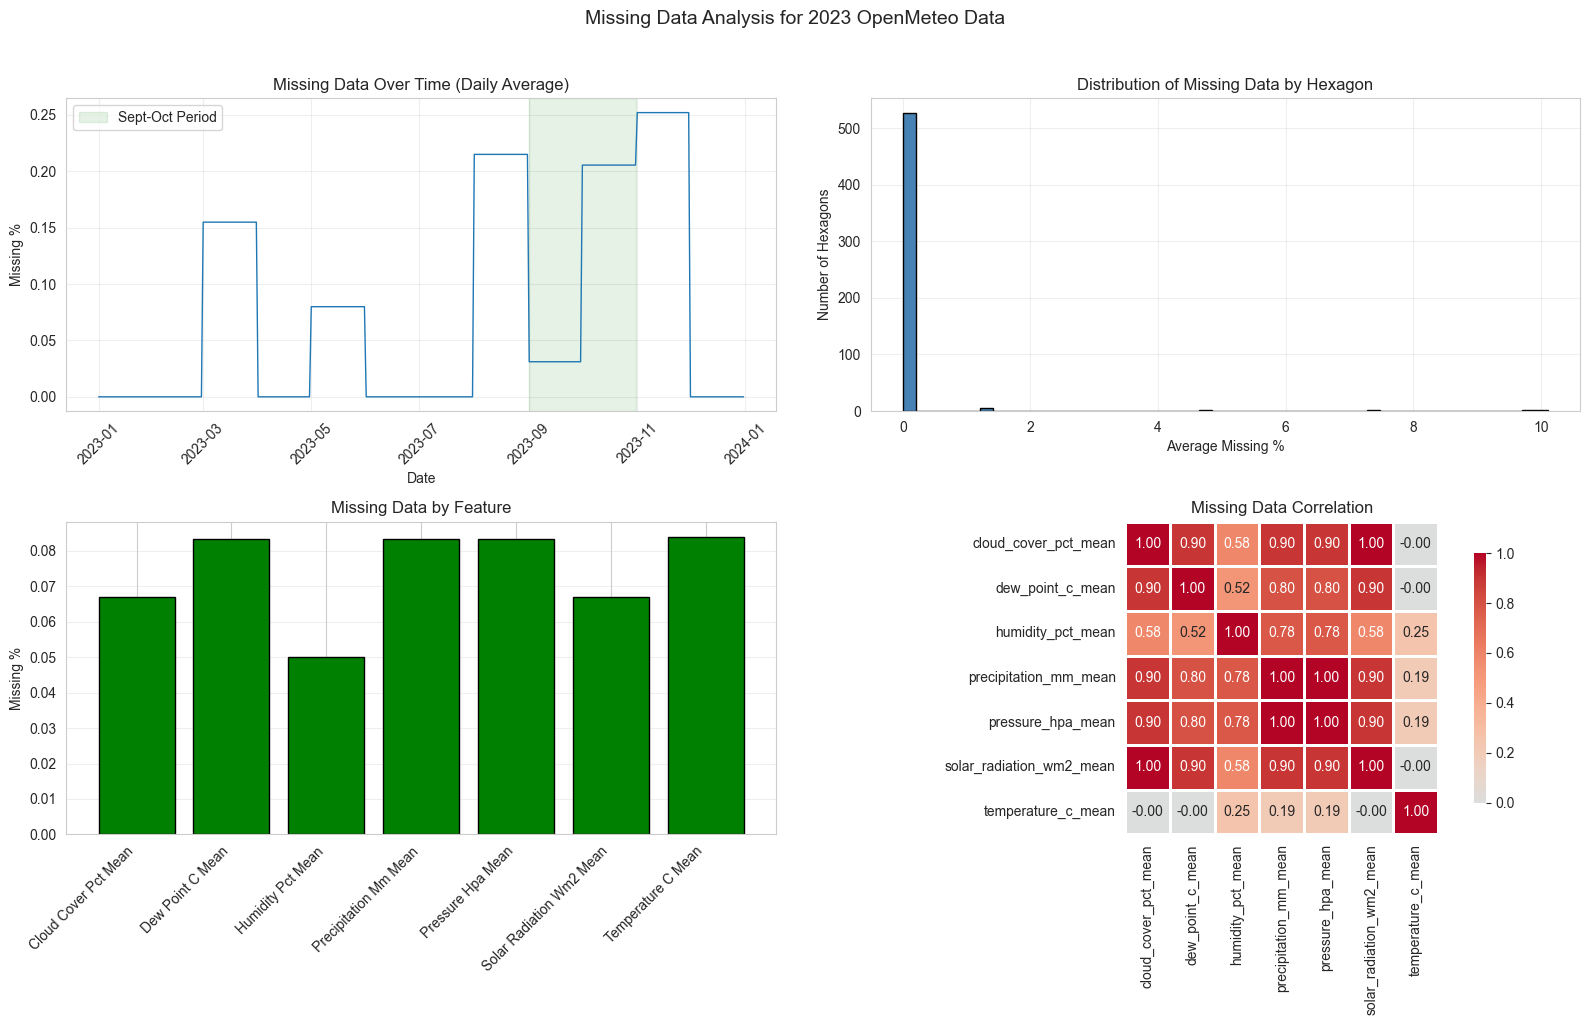

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Missing data over time
df['date'] = df['timestamp'].dt.date
daily_missing = df.groupby('date')[numerical_features].apply(lambda x: x.isnull().mean() * 100)

axes[0, 0].plot(daily_missing.index, daily_missing.mean(axis=1), linewidth=1)
axes[0, 0].set_title('Missing Data Over Time (Daily Average)', fontsize=12)
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Missing %')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Highlight Sept-Oct if present
axes[0, 0].axvspan(pd.Timestamp('2023-09-01'), pd.Timestamp('2023-10-31'), 
                   color='green', alpha=0.1, label='Sept-Oct Period')
axes[0, 0].legend()

# Missing by hexagon
hex_missing = df.groupby('h3_index_res8')[numerical_features].apply(lambda x: x.isnull().mean() * 100)
axes[0, 1].hist(hex_missing.mean(axis=1), bins=50, edgecolor='black', color='steelblue')
axes[0, 1].set_title('Distribution of Missing Data by Hexagon', fontsize=12)
axes[0, 1].set_xlabel('Average Missing %')
axes[0, 1].set_ylabel('Number of Hexagons')
axes[0, 1].grid(True, alpha=0.3)

# Missing by feature
feature_missing = df[numerical_features].isnull().mean() * 100
colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in feature_missing.values]
bars = axes[1, 0].bar(range(len(feature_missing)), feature_missing.values, color=colors, edgecolor='black')
axes[1, 0].set_xticks(range(len(feature_missing)))
axes[1, 0].set_xticklabels([f.replace('_', ' ').title() for f in feature_missing.index], rotation=45, ha='right')
axes[1, 0].set_title('Missing Data by Feature', fontsize=12)
axes[1, 0].set_ylabel('Missing %')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Missing correlation
missing_corr = df[numerical_features].isnull().astype(int).corr()
sns.heatmap(missing_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1, 1])
axes[1, 1].set_title('Missing Data Correlation', fontsize=12)

plt.suptitle('Missing Data Analysis for 2023 OpenMeteo Data', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 4. Temporal Coverage Calendar

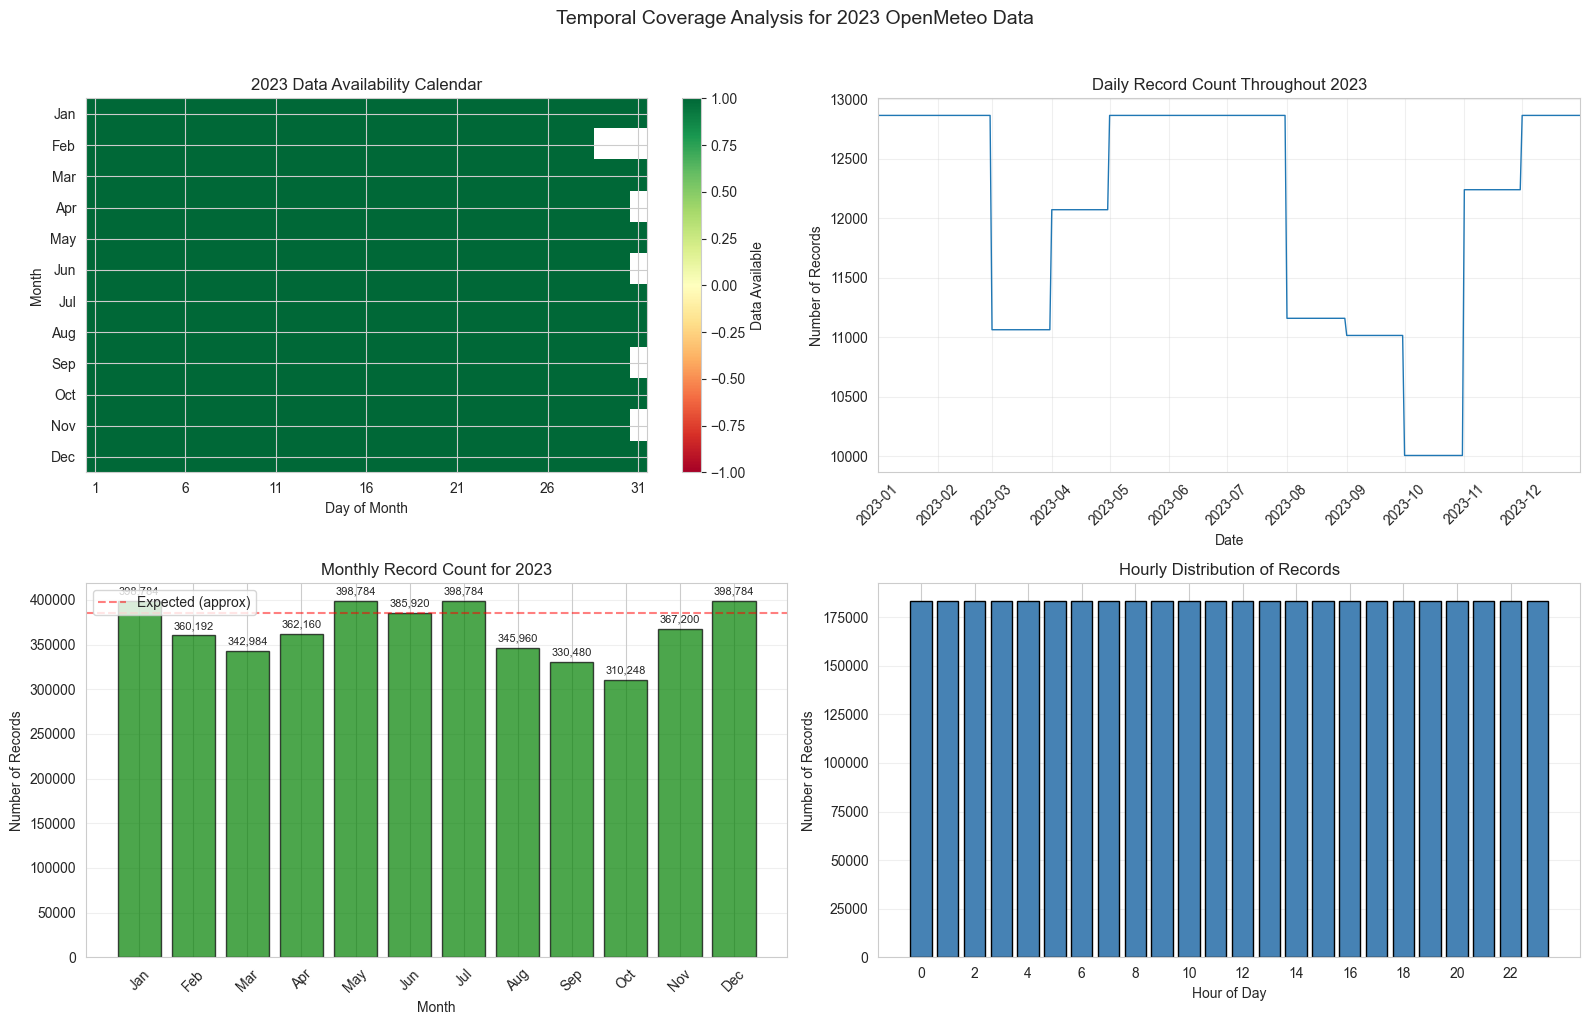

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Calendar heatmap
calendar_data = np.zeros((12, 31))
for date in all_dates_2023:
    month = date.month - 1
    day = date.day - 1
    if day < 31:  # Handle months with less than 31 days
        if date in existing_dates:
            calendar_data[month, day] = 1
        else:
            calendar_data[month, day] = -1

# Mark invalid days as NaN
calendar_data[calendar_data == 0] = np.nan

im = axes[0, 0].imshow(calendar_data, cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)
axes[0, 0].set_title('2023 Data Availability Calendar', fontsize=12)
axes[0, 0].set_xlabel('Day of Month')
axes[0, 0].set_ylabel('Month')
axes[0, 0].set_yticks(range(12))
axes[0, 0].set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0, 0].set_xticks(range(0, 31, 5))
axes[0, 0].set_xticklabels(range(1, 32, 5))
plt.colorbar(im, ax=axes[0, 0], label='Data Available')

# Daily record count
date_range = pd.date_range('2023-01-01', '2023-12-31', freq='D')
daily_counts = df.groupby('date').size().reindex(date_range.date, fill_value=0)
axes[0, 1].plot(daily_counts.index, daily_counts.values, linewidth=1)
axes[0, 1].set_title('Daily Record Count Throughout 2023', fontsize=12)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Records')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xlim(date_range[0], date_range[-1])
axes[0, 1].grid(True, alpha=0.3)

# Monthly bar chart
all_months = pd.period_range('2023-01', '2023-12', freq='M')
monthly_coverage = df.groupby(df['timestamp'].dt.to_period('M')).size().reindex(all_months, fill_value=0)
expected_monthly = df['h3_index_res8'].nunique() * 24 * 30  # Approximate

colors = ['green' if val > 0 else 'red' for val in monthly_coverage.values]
bars = axes[1, 0].bar(range(12), monthly_coverage.values, color=colors, edgecolor='black', alpha=0.7)
axes[1, 0].axhline(y=expected_monthly, color='r', linestyle='--', label='Expected (approx)', alpha=0.5)
axes[1, 0].set_title('Monthly Record Count for 2023', fontsize=12)
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Records')
axes[1, 0].set_xticks(range(12))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars, monthly_coverage.values):
    if val > 0:
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
                        f'{val:,}', ha='center', va='bottom', fontsize=8)

# Hourly distribution
hourly_counts = df.groupby(df['timestamp'].dt.hour).size()
axes[1, 1].bar(hourly_counts.index, hourly_counts.values, color='steelblue', edgecolor='black')
axes[1, 1].set_title('Hourly Distribution of Records', fontsize=12)
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Number of Records')
axes[1, 1].set_xticks(range(0, 24, 2))
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Temporal Coverage Analysis for 2023 OpenMeteo Data', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 5. Feature Distributions

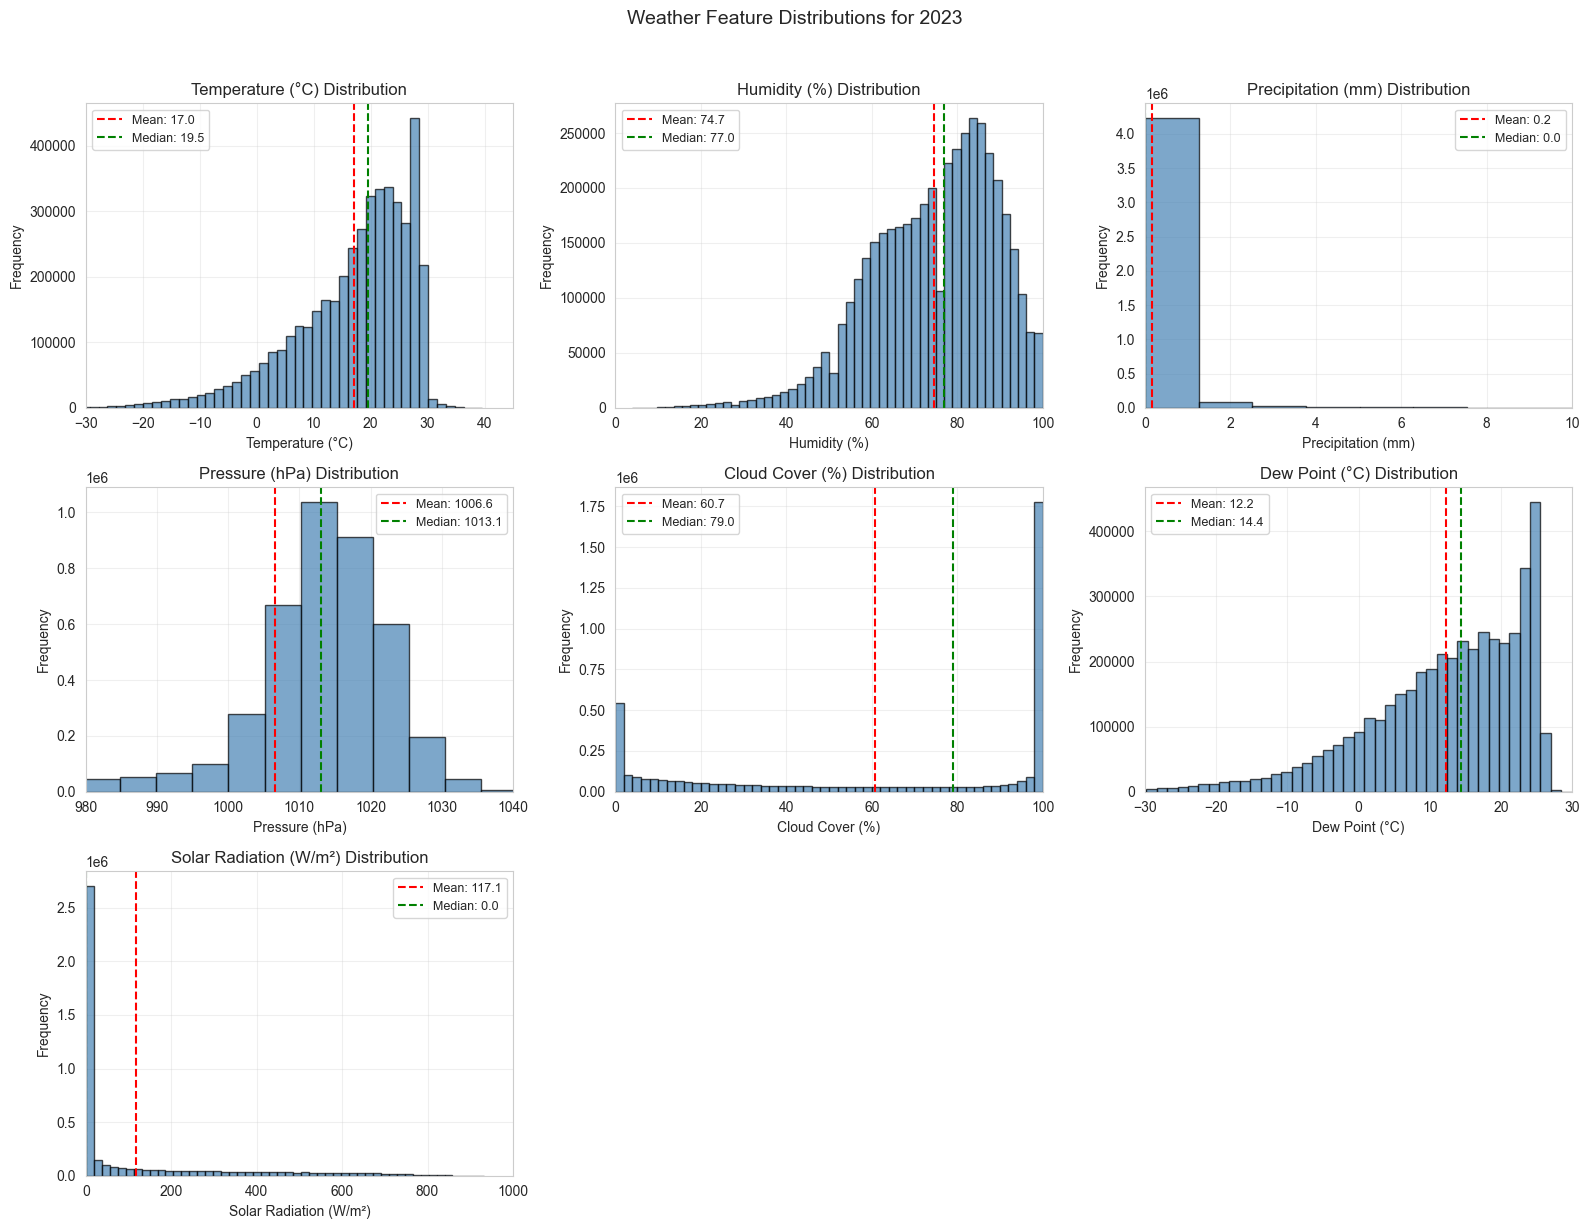

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

features_to_plot = [
    ('temperature_c_mean', 'Temperature (°C)', (-30, 45)),
    ('humidity_pct_mean', 'Humidity (%)', (0, 100)),
    ('precipitation_mm_mean', 'Precipitation (mm)', (0, 10)),
    ('pressure_hpa_mean', 'Pressure (hPa)', (980, 1040)),
    ('cloud_cover_pct_mean', 'Cloud Cover (%)', (0, 100)),
    ('dew_point_c_mean', 'Dew Point (°C)', (-30, 30)),
    ('solar_radiation_wm2_mean', 'Solar Radiation (W/m²)', (0, 1000)),
]

for idx, (feature, label, xlim) in enumerate(features_to_plot):
    if feature in df.columns:
        data = df[feature].dropna()
        data = data[np.isfinite(data)]
        
        if len(data) > 0:
            axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
            axes[idx].set_xlabel(label)
            axes[idx].set_ylabel('Frequency')
            axes[idx].set_title(f'{label} Distribution')
            if xlim:
                axes[idx].set_xlim(xlim)
            
            mean_val = data.mean()
            median_val = data.median()
            axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
            axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
            axes[idx].legend(loc='best', fontsize=9)
            axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(features_to_plot), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Weather Feature Distributions for 2023', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 6. Geographic Coverage

In [10]:
hex_locations = df[['h3_index_res8', 'h3_lat_res8', 'h3_lon_res8']].drop_duplicates()
print(f"Geographic Coverage:")
print("="*60)
print(f"Unique hexagons: {len(hex_locations):,}")
print(f"Latitude range: {hex_locations['h3_lat_res8'].min():.2f} to {hex_locations['h3_lat_res8'].max():.2f}")
print(f"Longitude range: {hex_locations['h3_lon_res8'].min():.2f} to {hex_locations['h3_lon_res8'].max():.2f}")

hex_data_counts = df.groupby('h3_index_res8').size().reset_index(name='record_count')
hex_with_counts = hex_locations.merge(hex_data_counts, on='h3_index_res8')

print(f"\nRecords per hexagon:")
print(f"  Mean: {hex_with_counts['record_count'].mean():.0f}")
print(f"  Median: {hex_with_counts['record_count'].median():.0f}")
print(f"  Min: {hex_with_counts['record_count'].min()}")
print(f"  Max: {hex_with_counts['record_count'].max()}")

# Check completeness
expected_records_per_hex = 365 * 24  # Full year, hourly
completeness = hex_with_counts['record_count'] / expected_records_per_hex * 100
print(f"\nData completeness per hexagon:")
print(f"  Mean: {completeness.mean():.1f}%")
print(f"  Median: {completeness.median():.1f}%")
print(f"  Min: {completeness.min():.1f}%")
print(f"  Max: {completeness.max():.1f}%")

Geographic Coverage:
Unique hexagons: 536
Latitude range: 24.00 to 45.00
Longitude range: 123.00 to 145.00

Records per hexagon:
  Mean: 8209
  Median: 8760
  Min: 4368
  Max: 8760

Data completeness per hexagon:
  Mean: 93.7%
  Median: 100.0%
  Min: 49.9%
  Max: 100.0%


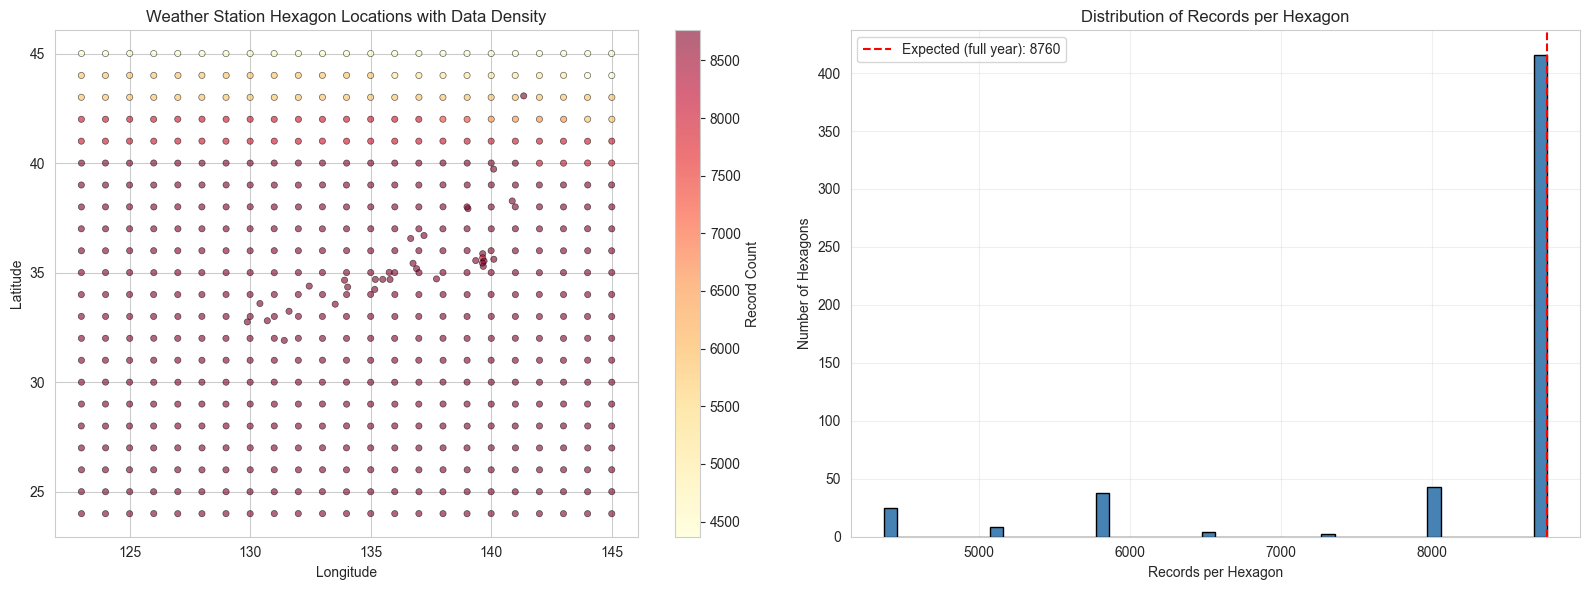

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Geographic distribution with data density
scatter = axes[0].scatter(hex_with_counts['h3_lon_res8'], 
                         hex_with_counts['h3_lat_res8'],
                         c=hex_with_counts['record_count'],
                         cmap='YlOrRd', s=20, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Weather Station Hexagon Locations with Data Density')
plt.colorbar(scatter, ax=axes[0], label='Record Count')

# Distribution of records per hexagon
axes[1].hist(hex_with_counts['record_count'], bins=50, edgecolor='black', color='steelblue')
axes[1].set_xlabel('Records per Hexagon')
axes[1].set_ylabel('Number of Hexagons')
axes[1].set_title('Distribution of Records per Hexagon')
axes[1].axvline(expected_records_per_hex, color='red', linestyle='--', 
                label=f'Expected (full year): {expected_records_per_hex}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Statistical Summary

In [12]:
print("Statistical Summary of Weather Features:")
print("="*60)
display(df[numerical_features].describe())

Statistical Summary of Weather Features:


,cloud_cover_pct_mean,dew_point_c_mean,humidity_pct_mean,precipitation_mm_mean,pressure_hpa_mean,solar_radiation_wm2_mean,temperature_c_mean
count,4397328.00,4396608.00,4398072.00,4396608.00,4396608.00,4397328.00,4396584.00
mean,60.68,12.24,74.66,0.17,1006.60,117.06,17.01
std,41.00,11.08,14.49,0.82,26.20,201.68,10.21
min,0.00,-42.90,4.00,0.00,787.10,0.00,-38.70
25%,16.00,6.00,65.00,0.00,1006.80,0.00,11.50
50%,79.00,14.40,77.00,0.00,1013.10,0.00,19.50
75%,100.00,21.40,86.00,0.00,1018.80,158.00,24.70
max,100.00,29.90,100.00,62.80,1040.60,933.00,39.50


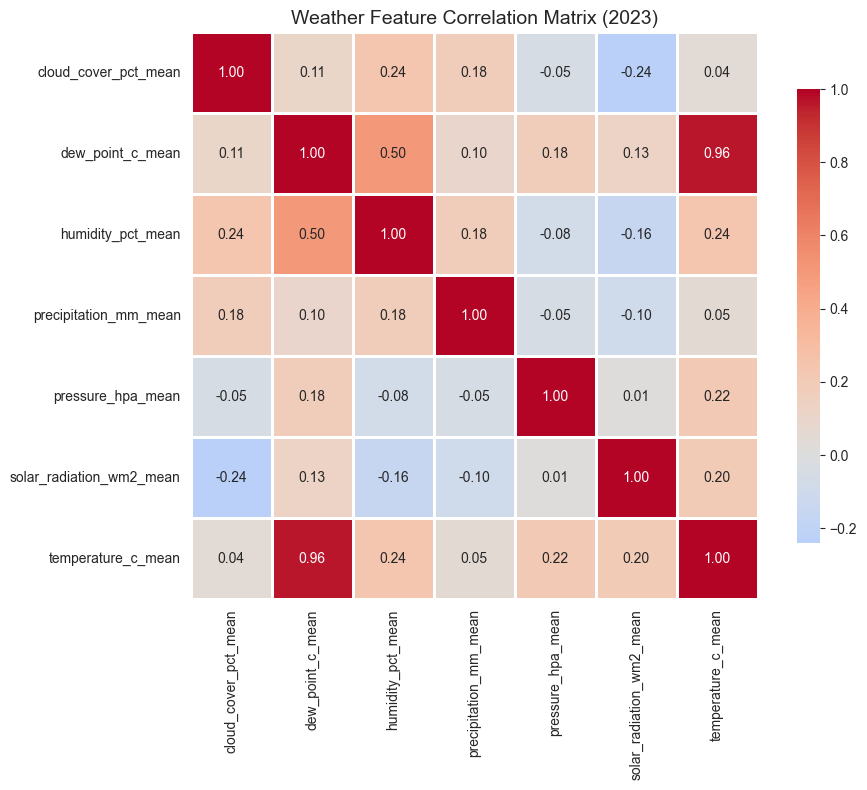


Strongest correlations with temperature:
  dew_point_c_mean: 0.958


In [13]:
# Correlation matrix
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Weather Feature Correlation Matrix (2023)', fontsize=14)
plt.tight_layout()
plt.show()

# Print strongest correlations
print("\nStrongest correlations with temperature:")
temp_corr = correlation_matrix['temperature_c_mean'].sort_values(ascending=False)
for feature, corr in temp_corr.items():
    if feature != 'temperature_c_mean' and abs(corr) > 0.3:
        print(f"  {feature}: {corr:.3f}")

## 8. Seasonal Patterns

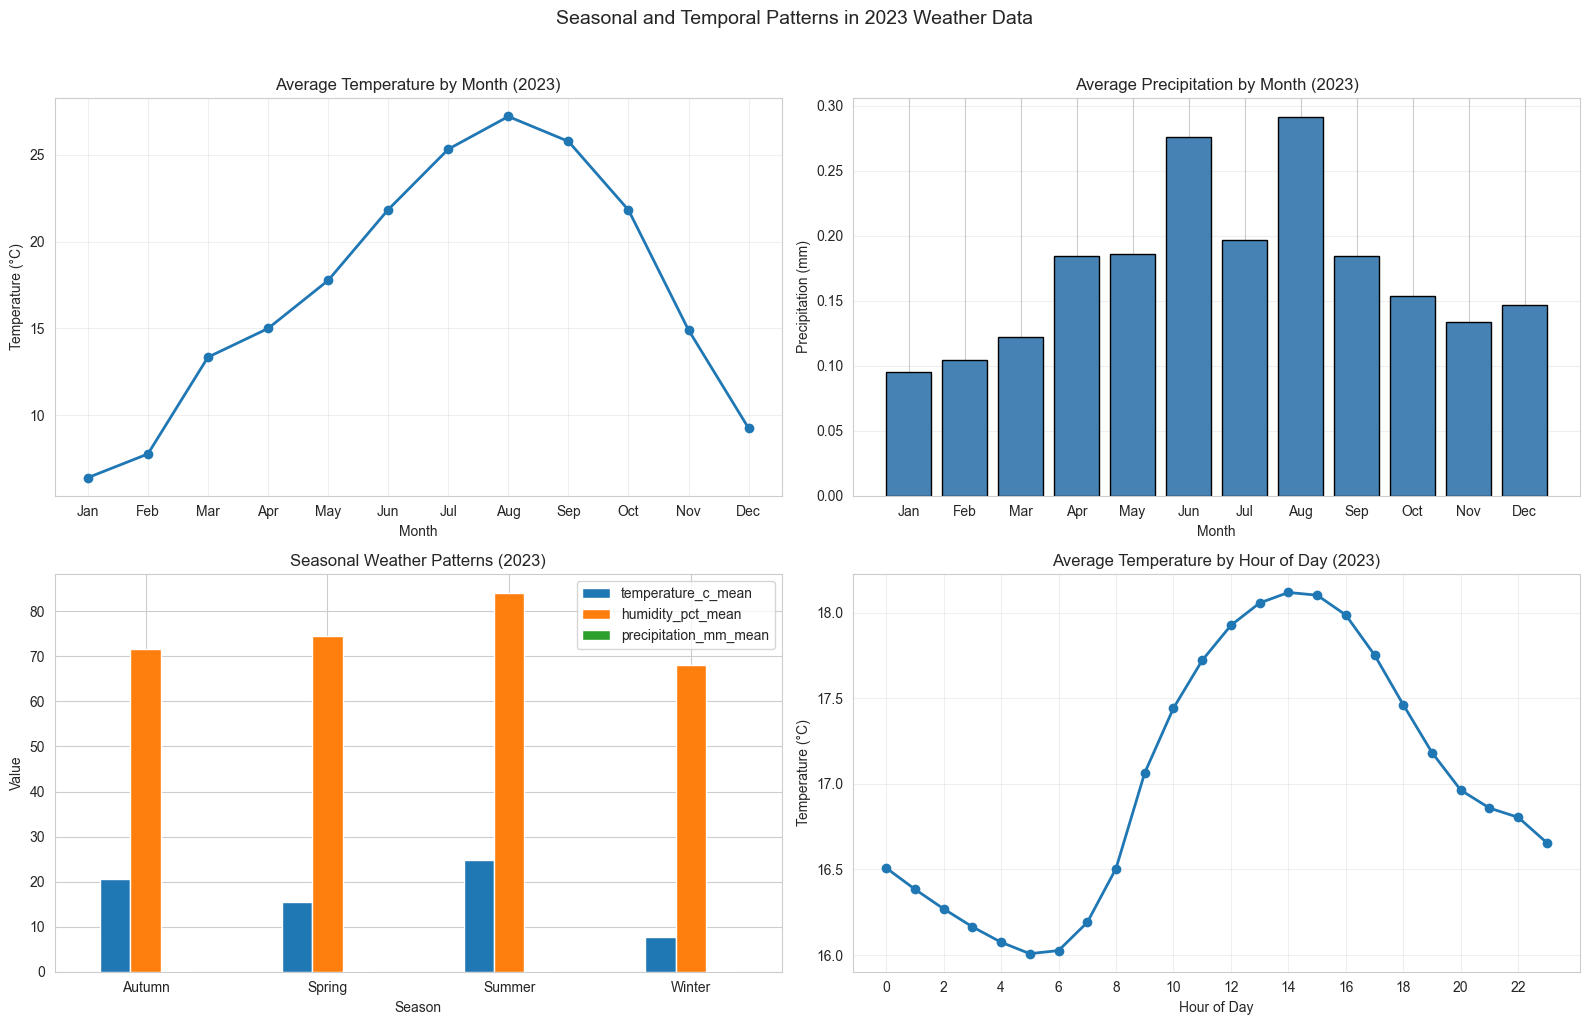

In [14]:
# Add temporal features
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour
df['season'] = df['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                 3: 'Spring', 4: 'Spring', 5: 'Spring',
                                 6: 'Summer', 7: 'Summer', 8: 'Summer',
                                 9: 'Autumn', 10: 'Autumn', 11: 'Autumn'})

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Monthly temperature
monthly_temp = df.groupby('month')['temperature_c_mean'].mean()
axes[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o', linewidth=2)
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_title('Average Temperature by Month (2023)')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0, 0].grid(True, alpha=0.3)

# Monthly precipitation
monthly_precip = df.groupby('month')['precipitation_mm_mean'].mean()
axes[0, 1].bar(monthly_precip.index, monthly_precip.values, color='steelblue', edgecolor='black')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Precipitation (mm)')
axes[0, 1].set_title('Average Precipitation by Month (2023)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Seasonal patterns
if 'season' in df.columns and df['season'].notna().any():
    seasonal_stats = df.groupby('season')[['temperature_c_mean', 'humidity_pct_mean', 
                                           'precipitation_mm_mean']].mean()
    seasonal_stats.plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('Seasonal Weather Patterns (2023)', fontsize=12)
    axes[1, 0].set_xlabel('Season')
    axes[1, 0].set_ylabel('Value')
    axes[1, 0].legend(loc='best')
    axes[1, 0].tick_params(axis='x', rotation=0)

# Hourly temperature pattern
hourly_temp = df.groupby('hour')['temperature_c_mean'].mean()
axes[1, 1].plot(hourly_temp.index, hourly_temp.values, marker='o', linewidth=2)
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Temperature (°C)')
axes[1, 1].set_title('Average Temperature by Hour of Day (2023)')
axes[1, 1].set_xticks(range(0, 24, 2))
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Seasonal and Temporal Patterns in 2023 Weather Data', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 9. Data Quality Summary

In [ ]:
print("OPENMETEO 2023 DATA QUALITY SUMMARY")
print("="*60)

print("\n📊 DATASET OVERVIEW:")
print(f"   Total records: {len(df):,}")
print(f"   Time period: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")
print(f"   Unique locations (hexagons): {df['h3_index_res8'].nunique()}")
print(f"   Temporal resolution: Hourly")

print("\n📅 TEMPORAL COVERAGE:")
print(f"   Days with data: {len(existing_dates)}/365 ({len(existing_dates)/365*100:.1f}%)")
if len(existing_dates) == 365:
    print("   ✓ COMPLETE YEAR COVERAGE")
    print("   ✓ September 2023 INCLUDED")
    print("   ✓ October 2023 INCLUDED")
else:
    print(f"   ⚠ Missing {365-len(existing_dates)} days")
    if missing_dates:
        print(f"   Missing periods: {missing_dates[0]} to {missing_dates[-1]}")

print("\n🌡️ KEY WEATHER STATISTICS:")
print(f"   Temperature range: {df['temperature_c_mean'].min():.1f}°C to {df['temperature_c_mean'].max():.1f}°C")
print(f"   Mean temperature: {df['temperature_c_mean'].mean():.1f}°C")
print(f"   Mean humidity: {df['humidity_pct_mean'].mean():.1f}%")
print(f"   Mean precipitation: {df['precipitation_mm_mean'].mean():.2f} mm")

print("\n✅ DATA COMPLETENESS:")
for feature in numerical_features:
    completeness = df[feature].notna().mean() * 100
    print(f"   {feature}: {completeness:.1f}%")

print("\n💾 DATASET READY FOR:")
print("   • PM2.5 enrichment with weather features")
print("   • Time series analysis")
print("   • Spatial-temporal modeling")
print("   • Air quality prediction models")

if len(existing_dates) == 365:
    print("\n🎯 IMPORTANT: This dataset now includes the previously missing")
    print("   September and October 2023 data, providing complete coverage")
    print("   for the entire year 2023.")

OPENMETEO 2023 DATA QUALITY SUMMARY

📊 DATASET OVERVIEW:
   Total records: 4,400,280
   Time period: 2023-01-01 to 2023-12-31
   Unique locations (hexagons): 536
   Temporal resolution: Hourly

📅 TEMPORAL COVERAGE:
   Days with data: 365/365 (100.0%)
   ✓ COMPLETE YEAR COVERAGE
   ✓ September 2023 INCLUDED
   ✓ October 2023 INCLUDED

🌡️ KEY WEATHER STATISTICS:
   Temperature range: -38.7°C to 39.5°C
   Mean temperature: 17.0°C
   Mean humidity: 74.7%
   Mean precipitation: 0.17 mm

✅ DATA COMPLETENESS:
   cloud_cover_pct_mean: 99.9%
   dew_point_c_mean: 99.9%
   humidity_pct_mean: 99.9%
   precipitation_mm_mean: 99.9%
   pressure_hpa_mean: 99.9%
   solar_radiation_wm2_mean: 99.9%
   temperature_c_mean: 99.9%

💾 DATASET READY FOR:
   • PM2.5 enrichment with weather features
   • Time series analysis
   • Spatial-temporal modeling
   • Air quality prediction models

🎯 IMPORTANT: This dataset now includes the previously missing
   September and October 2023 data, providing complete covera

: 